# Data mining Project

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Converting .txt to .csv

In [5]:
file_path = 'data.txt'

df = pd.read_csv(file_path, delimiter='\t', header=None)


columns = [
    "ID","Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness","Symptoms_exp_Blood_cough","Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath","Symptoms_exp_weakness","Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical","Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional","Daily_Life_Impact_family_life","Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect","Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]

df.columns = columns


df.to_csv('processed_survey_data_columns.csv', index=False)
df.head()

,ID,Gender,Age_Group,Residence,Education_Level,Source_of_Income,Marital_Status,Smoked_Cigarettes,Year_Diagnosed,Surgical_Treatment,...,Daily_Life_Impact_family_life,Daily_Life_Impact_social_life,Daily_Life_Impact_no_effect,Energy_Level,Self_Care,Daily_Activities_Difficulty,Work_Readiness,Support_Satisfaction,Coping_Strategy,Negative_Emotions
0,1,1,1,2,4,1,1,1,2021,0,...,0,0,0,2,1,1,2,2,3,3
1,2,1,2,4,3,1,2,1,2020,1,...,0,0,0,2,1,2,2,2,3,3
2,3,1,2,2,4,1,2,1,2020,1,...,0,0,0,2,1,1,2,1,3,2
3,4,2,4,4,3,3,2,1,2021,1,...,0,0,0,4,2,3,3,1,3,4
4,5,2,3,1,2,1,2,1,2019,1,...,0,0,0,2,1,1,3,3,3,3


# Data cleaning

In [6]:
df.shape

(300, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   gender                            300 non-null    int64
 1   age_group                         300 non-null    int64
 2   residence                         300 non-null    int64
 3   education_level                   300 non-null    int64
 4   source_of_income                  300 non-null    int64
 5   marital_status                    300 non-null    int64
 6   smoked_cigarettes                 300 non-null    int64
 7   year_diagnosed                    300 non-null    int64
 8   surgical_treatment                300 non-null    int64
 9   chemotherapy                      300 non-null    int64
 10  radiotherapy                      300 non-null    int64
 11  immunotherapy                     300 non-null    int64
 12  molecular_targeted_therapy        30

In [17]:
df.isna().sum()

ID                                  0
Gender                              0
Age_Group                           0
Residence                           0
Education_Level                     0
Source_of_Income                    0
Marital_Status                      0
Smoked_Cigarettes                   0
Year_Diagnosed                      0
Surgical_Treatment                  0
Chemotherapy                        0
Radiotherapy                        0
Immunotherapy                       0
Molecular_targeted_Therapy          0
Hospitalization_Number              0
Time_to_Treatment                   0
Medical_Treatment_Need              0
Emotional_Impact                    0
Travel_Impact                       0
Quality_of_Life                     0
Symptoms_exp_cough                  0
Symptoms_exp_Hoarseness             0
Symptoms_exp_Blood_cough            0
Symptoms_exp_chestpain              0
Symptoms_exp_Shortness_of_breath    0
Symptoms_exp_weakness               0
Symptoms_exp

In [168]:
# # 1. Remove duplicate rows
# df = df.drop_duplicates()
# print(f"\nData after removing duplicates: {df.shape}")

# # 2. Handle missing values
# numeric_columns = df.select_dtypes(include=['number']).columns
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# # Fill missing categorical values with mode
# categorical_columns = df.select_dtypes(include=['object']).columns
# df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
# print(f"\nData after handling missing values:\n{df.isnull().sum()}")

# # 3. Drop irrelevant or redundant columns  
# if 'ID' in df.columns:
#     df = df.drop(columns=['ID'])

# # 4. Standardize column names  
# df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

**All columns are integer value, numerical columns. But we have categorical columns in them like Gender, Marital Status, Smoked cigaretes, Chemoheraphy etc. ( some are binary, some are multiclass)**

In [22]:
df.head()

,gender,age_group,residence,education_level,source_of_income,marital_status,smoked_cigarettes,year_diagnosed,surgical_treatment,chemotherapy,...,daily_life_impact_family_life,daily_life_impact_social_life,daily_life_impact_no_effect,energy_level,self_care,daily_activities_difficulty,work_readiness,support_satisfaction,coping_strategy,negative_emotions
0,1,1,2,4,1,1,1,2021,0,1,...,0,0,0,2,1,1,2,2,3,3
1,1,2,4,3,1,2,1,2020,1,1,...,0,0,0,2,1,2,2,2,3,3
2,1,2,2,4,1,2,1,2020,1,0,...,0,0,0,2,1,1,2,1,3,2
3,2,4,4,3,3,2,1,2021,1,1,...,0,0,0,4,2,3,3,1,3,4
4,2,3,1,2,1,2,1,2019,1,1,...,0,0,0,2,1,1,3,3,3,3


**This chunk below is good if we had categorical columns detected.**

In [182]:
#to detect categories we can check the number of unique values in each columns, if it is less than 5 we can check them...
df.columns[df.nunique()>5]


Index(['year_diagnosed'], dtype='object')

In [183]:

#Looks like only year diagnosed has more than 4 entries and it is 7 ! It can be also taken as Categorical.
df.year_diagnosed.nunique()

7

In [209]:
# df.nunique()

binary_columns=df.columns[df.nunique()==2]
binary_columns
# (df[binary_columns]==2).sum()
df[binary_columns]=df[binary_columns].replace(2,0)



In [ ]:
# # Checking for Imbalances
# imbalances = {}

# for col in categorical_columns:
#     counts = df[col].value_counts(normalize=True)
#     if any(counts < 0.1):  
#         imbalances[col] = counts

# for col, counts in imbalances.items():
#     print(f"\nColumn: {col}")
#     print(counts)

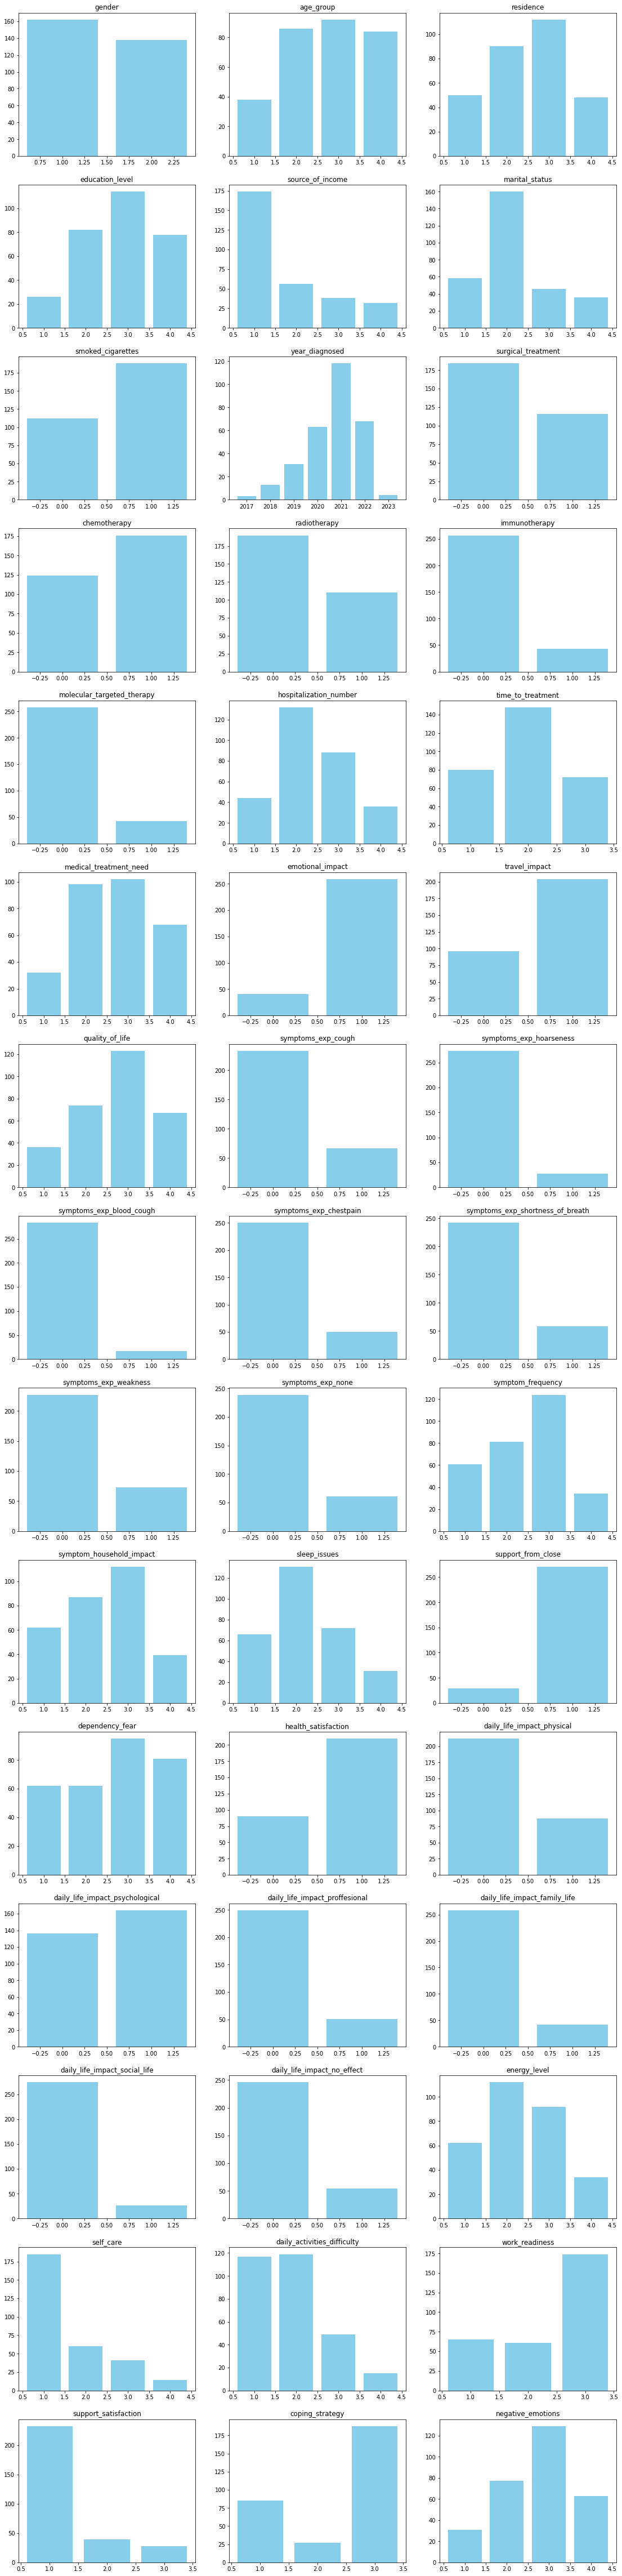

In [128]:
nrow=15
ncol=3
n=0
# Create a Figure
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 64))
fig.tight_layout(pad=3)  # Adjust spacing between subplots

# Flatten the 2D axes array to iterate over it easily
axes = axes.flatten()

# Plot each column in the DataFrame
for col in df.columns:
    counts=df[col].value_counts()
    if n >= len(axes):  # Stop if we exceed the number of subplots
        break
    ax = axes[n]
    ax.bar(counts.index, counts.values, color='skyblue')  # Bar plot for each column
    ax.set_title(col)  # Title for each subplot
    n += 1

# Hide unused subplots (if any)
for i in range(n, len(axes)):
    axes[i].axis('off')

# Show the final plot
plt.show()

**There is imbalance in some  columns.**
 



In [106]:
#Quick check for correlations
import seaborn as sns
correlation=df.corr()


<Axes: >

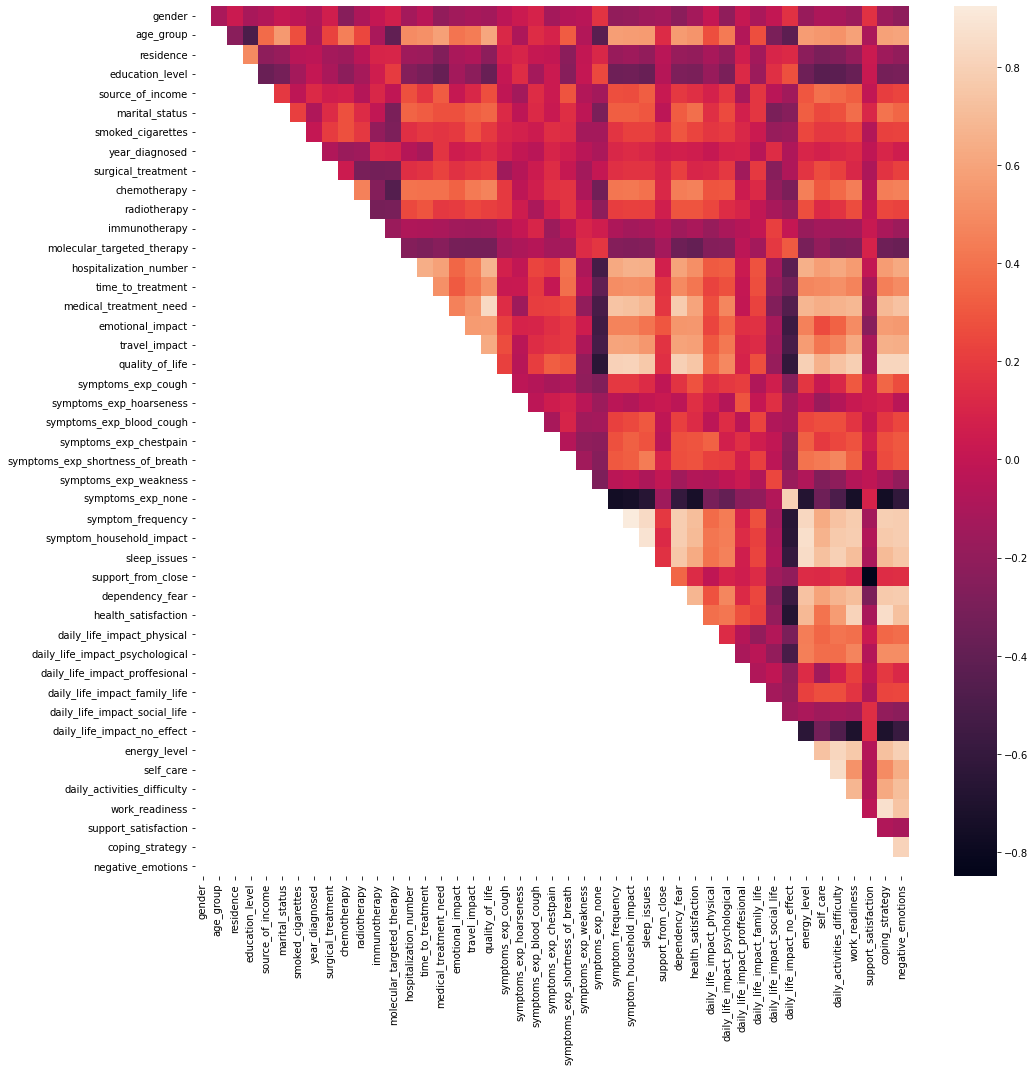

In [118]:
# Mask the upper triangle (to avoid duplicate pairs)

mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)

# Apply the mask to the correlation matrix
masked_corr = correlation.where(mask)
plt.figure(figsize=(16,16))

sns.heatmap(masked_corr)


## Highly correlated pairs at first glance:

In [131]:

high_corr_pairs = masked_corr.stack().loc[lambda x: x > 0.75]

# Display the highly correlated pairs
print(high_corr_pairs)

medical_treatment_need    quality_of_life                0.836878
                          dependency_fear                0.774507
quality_of_life           symptom_frequency              0.804922
                          symptom_household_impact       0.810825
                          sleep_issues                   0.763622
                          dependency_fear                0.798719
                          energy_level                   0.795971
                          work_readiness                 0.787306
                          coping_strategy                0.822634
                          negative_emotions              0.821857
symptoms_exp_none         daily_life_impact_no_effect    0.798049
symptom_frequency         symptom_household_impact       0.924228
                          sleep_issues                   0.844186
                          dependency_fear                0.781332
                          energy_level                   0.828773
          

# Data Analysis:
## Apriori for sub-groups:


In [ ]:
#Demographic Info:
demograhic_cols=df.columns[0:6]
demograhic_cols

Index(['gender', 'age_group', 'residence', 'education_level',
       'source_of_income', 'marital_status'],
      dtype='object')

In [136]:
df[demograhic_cols].nunique()


gender              2
age_group           4
residence           4
education_level     4
source_of_income    4
marital_status      4
dtype: int64

In [138]:
df.marital_status.value_counts()

2    160
1     58
3     46
4     36
Name: marital_status, dtype: int64

In [155]:
df_demog=df[demograhic_cols]
df_demog

,gender,age_group,residence,education_level,source_of_income,marital_status
0,1,1,2,4,1,1
1,1,2,4,3,1,2
2,1,2,2,4,1,2
3,2,4,4,3,3,2
4,2,3,1,2,1,2
...,...,...,...,...,...,...
295,1,2,4,3,1,1
296,2,3,3,2,1,2
297,1,3,2,2,1,3
298,2,3,4,3,1,3


In [214]:
df.gender=df.gender.replace(2,0)

In [ ]:
#OneHot coding:
df_demog_1hot=pd.get_dummies(df[demograhic_cols],columns=[name  for name in demograhic_cols if name!='gender' ])
df_demog_1hot

,gender,age_group_1,age_group_2,age_group_3,age_group_4,residence_1,residence_2,residence_3,residence_4,education_level_1,...,education_level_3,education_level_4,source_of_income_1,source_of_income_2,source_of_income_3,source_of_income_4,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,1,1,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
296,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
297,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
298,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0


In [224]:
# pip install mlxtend
df[demograhic_cols]==2

,gender,age_group,residence,education_level,source_of_income,marital_status
0,False,False,True,False,False,False
1,False,True,False,False,False,True
2,False,True,True,False,False,True
3,False,False,False,False,False,True
4,False,False,False,True,False,True
...,...,...,...,...,...,...
295,False,True,False,False,False,False
296,False,False,False,True,False,True
297,False,False,True,True,False,False
298,False,False,False,False,False,False


In [222]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [227]:
demog_frequent_itemsets = apriori(df_demog_1hot, min_support=0.2, use_colnames=True)
demog_frequent_itemsets

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.540000,(gender)
1,0.286667,(age_group_2)
2,0.306667,(age_group_3)
3,0.280000,(age_group_4)
4,0.300000,(residence_2)
5,0.373333,(residence_3)
6,0.273333,(education_level_2)
7,0.380000,(education_level_3)
8,0.260000,(education_level_4)
9,0.580000,(source_of_income_1)


## Apriori for the Entire Data Set:

In [233]:
df_1hot=pd.get_dummies(df,columns=df.columns)
df_1hot

,gender_0,gender_1,age_group_1,age_group_2,age_group_3,age_group_4,residence_1,residence_2,residence_3,residence_4,...,support_satisfaction_1,support_satisfaction_2,support_satisfaction_3,coping_strategy_1,coping_strategy_2,coping_strategy_3,negative_emotions_1,negative_emotions_2,negative_emotions_3,negative_emotions_4
0,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
296,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
297,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
298,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0


In [267]:
import time as time

In [ ]:
#Running the Apriori code and timing the process:
start_time=time.time()
freq_items_all=apriori(df_1hot,min_support=.5,use_colnames=True)
end_time=time.time()


/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [273]:
#Runtime:
duration=end_time-start_time
duration

0.10344505310058594

In [240]:
freq_items_all

,support,itemsets
0,0.540000,(gender_1)
1,0.580000,(source_of_income_1)
2,0.533333,(marital_status_2)
3,0.626667,(smoked_cigarettes_1)
4,0.613333,(surgical_treatment_0)
...,...,...
5242,0.516667,"(emotional_impact_1, daily_life_impact_social_..."
5243,0.506667,"(emotional_impact_1, daily_life_impact_social_..."
5244,0.506667,"(emotional_impact_1, daily_life_impact_social_..."
5245,0.500000,"(emotional_impact_1, daily_life_impact_social_..."


In [274]:
# Generate association rules with a minimum confidence of 0.7
rules_all = association_rules(freq_items_all, metric="confidence", min_threshold=0.9,num_itemsets=10)

rules_all



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(gender_1),(symptoms_exp_blood_cough_0),0.540000,0.943333,0.520000,0.962963,1.020809,1.0,0.010600,1.530000,0.044314,0.539792,0.346405,0.757100
1,(gender_1),(support_from_close_1),0.540000,0.903333,0.506667,0.938272,1.038677,1.0,0.018867,1.566000,0.080950,0.540925,0.361430,0.749579
2,(source_of_income_1),(symptoms_exp_blood_cough_0),0.580000,0.943333,0.563333,0.971264,1.029609,1.0,0.016200,1.972000,0.068470,0.586806,0.492901,0.784219
3,(source_of_income_1),(symptoms_exp_shortness_of_breath_0),0.580000,0.806667,0.543333,0.936782,1.161300,1.0,0.075467,3.058182,0.330704,0.644269,0.673008,0.805168
4,(source_of_income_1),(daily_life_impact_family_life_0),0.580000,0.860000,0.530000,0.913793,1.062550,1.0,0.031200,1.624000,0.140162,0.582418,0.384236,0.765036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31358,"(coping_strategy_3, health_satisfaction_1, sup...","(emotional_impact_1, symptoms_exp_none_0, dail...",0.516667,0.693333,0.500000,0.967742,1.395782,1.0,0.141778,9.506667,0.586667,0.704225,0.894811,0.844448
31359,"(daily_life_impact_no_effect_0, support_from_c...","(emotional_impact_1, symptoms_exp_none_0, heal...",0.533333,0.650000,0.500000,0.937500,1.442308,1.0,0.153333,5.600000,0.657143,0.731707,0.821429,0.853365
31360,"(coping_strategy_3, daily_life_impact_social_l...","(emotional_impact_1, symptoms_exp_none_0, heal...",0.546667,0.640000,0.500000,0.914634,1.429116,1.0,0.150133,4.217143,0.662353,0.728155,0.762873,0.847942
31361,"(coping_strategy_3, health_satisfaction_1, sym...","(emotional_impact_1, daily_life_impact_social_...",0.553333,0.656667,0.500000,0.903614,1.376063,1.0,0.136644,3.562083,0.611841,0.704225,0.719265,0.832518


In [275]:
# Show the association rules
rules_all.loc[31351,:]['antecedents']

frozenset({'coping_strategy_3',
           'daily_life_impact_social_life_0',
           'health_satisfaction_1',
           'support_from_close_1'})

In [276]:
rules_all.loc[31351,:]['consequents']

frozenset({'daily_life_impact_no_effect_0',
           'emotional_impact_1',
           'symptoms_exp_blood_cough_0',
           'symptoms_exp_none_0'})

In [277]:
rules_all.loc[31351,:]['confidence']

0.9090909090909091